# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [89]:
import matplotlib.pyplot as plt
import os
import requests
import json
import pandas as pd
import numpy as np
from citipy import citipy
from scipy import stats
from api_keys import weather_api_key

## Generate Cities List

In [2]:
# Need to create random lists for lat and lng
lat = []
lng = []

lat = np.random.uniform(low=-90.0, high=90.0, size=1250)
lng = np.random.uniform(low=-180.0, high=180.0, size=1250)

# Zip lat and lng lists
combined_lat_lng = zip(lat, lng)

# Create a list of cities using lat and lng
cities_list = []

for x in combined_lat_lng:
    city = citipy.nearest_city(x[0], x[1]).city_name
    
    # city is unique add to the list
    if city not in cities_list:
        cities_list.append(city)

len(cities_list)

519

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# setting up URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

# empty lists to hold data
city_names = []
city_ids = []
lat_list = []
lng_list = []
temp_list = []
cloud_list = []
humidity_list = []
wind_speed_list = []
max_temp_list = []
country_list = []
date_list = []

#response_json = requests.get(query_url + cities_list[0]).json()
#print(json.dumps(response_json, indent=4, sort_keys=True))

for city in cities_list:
    
    response_json = requests.get(query_url + city).json()
    
    # try and except, need to account for errors if no data
    
    try:
        city_names.append(response_json["name"])
        
        # Creating a variable to hold city id for print out
        city_id = response_json["id"]
        city_ids.append(city_id)
        
        cloud_list.append(response_json["clouds"]["all"])
        lat_list.append(response_json["coord"]["lat"])
        lng_list.append(response_json["coord"]["lon"])
        temp_list.append(response_json["main"]["temp"])
        humidity_list.append(response_json["main"]["humidity"])
        wind_speed_list.append(response_json["wind"]["speed"])
        max_temp_list.append(response_json["main"]["temp_max"])
        country_list.append(response_json["sys"]["country"])
        date_list.append(response_json["dt"])
        print(f"Processing city: {city}, city id: {city_id}")
    
    except:
        print("City not found.....skipping")

Processing city: kaitangata, city id: 2208248
Processing city: rikitea, city id: 4030556
Processing city: rock sound, city id: 3571592
Processing city: vaini, city id: 4032243
Processing city: vardo, city id: 777019
Processing city: campbell river, city id: 5914132
Processing city: scarborough, city id: 2638419
Processing city: karangampel, city id: 1641342
City not found.....skipping
Processing city: hilo, city id: 5855927
City not found.....skipping
Processing city: chumikan, city id: 2025256
Processing city: omagh, city id: 2640967
City not found.....skipping
Processing city: jamestown, city id: 5122534
Processing city: svetlogorsk, city id: 10722858
Processing city: severo-kurilsk, city id: 2121385
Processing city: mataura, city id: 6201424
Processing city: punta arenas, city id: 3874787
Processing city: aksu, city id: 1529660
Processing city: esperance, city id: 2071860
Processing city: isangel, city id: 2136825
Processing city: winneba, city id: 2294034
Processing city: nome, cit

Processing city: antalaha, city id: 1071296
Processing city: riyadh, city id: 108410
Processing city: kiunga, city id: 2093846
City not found.....skipping
Processing city: nuoro, city id: 3172154
Processing city: owando, city id: 2255542
Processing city: kavieng, city id: 2094342
Processing city: mastic beach, city id: 5126209
Processing city: russell, city id: 4047434
Processing city: the valley, city id: 3573374
Processing city: kungsbacka, city id: 2698729
Processing city: sobolevo, city id: 525426
Processing city: tautira, city id: 4033557
Processing city: luziania, city id: 3458329
Processing city: batagay-alyta, city id: 2027042
Processing city: guerrero negro, city id: 4021858
Processing city: lukovetskiy, city id: 533418
Processing city: cabo san lucas, city id: 3985710
Processing city: karaton, city id: 1630058
Processing city: narsaq, city id: 3421719
Processing city: tucurui, city id: 3385935
Processing city: rajauri, city id: 1258891
Processing city: mandera, city id: 18789

Processing city: gijon, city id: 3121424
Processing city: new bern, city id: 4481682
Processing city: dabat, city id: 340358
Processing city: siderno, city id: 6540819
Processing city: baykit, city id: 1510689
Processing city: san quintin, city id: 3984997
Processing city: la ronge, city id: 6050066
Processing city: lamu, city id: 189741
Processing city: wick, city id: 2633982
Processing city: tazovskiy, city id: 1489853
Processing city: iquique, city id: 3887127
Processing city: nebolchi, city id: 523051
Processing city: san policarpo, city id: 1688696
Processing city: burgeo, city id: 5911440
Processing city: ambon, city id: 1651531
Processing city: vanimo, city id: 2084442
Processing city: bafata, city id: 2375255
Processing city: moron, city id: 3430545
City not found.....skipping
Processing city: hit, city id: 95788
Processing city: vila velha, city id: 3445026
Processing city: christchurch, city id: 2192362
Processing city: zyryanka, city id: 2119283
Processing city: mar del plat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# output file
output_file = "../output_data/cities.csv"

# create dataframe to hold the information
cities_df = pd.DataFrame({"City": city_names, "Lat": lat_list, "Lng": lng_list, "Temp": temp_list,
                          "Max Temp": max_temp_list, "Humidity": humidity_list,
                          "Cloudiness": cloud_list, "Wind Speed": wind_speed_list,
                          "Country": country_list, "Date": date_list})

cities_df.to_csv(output_file)
cities_df.head(5)

,City,Lat,Lng,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,55.00,55.00,75,100,1.99,NZ,1619644753
1,Rikitea,-23.1203,-134.9692,76.21,76.21,66,38,9.60,PF,1619644768
2,Rock Sound,24.9000,-76.2000,76.82,76.82,76,36,16.89,BS,1619644768
3,Vaini,-21.2000,-175.2000,78.80,78.80,89,75,9.22,TO,1619644765
4,Vardø,70.3705,31.1107,22.10,23.00,80,20,9.22,NO,1619644768


In [11]:
cities_df.describe()

,Lat,Lng,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.00000,480.000000,4.800000e+02
mean,19.477800,21.622359,59.912250,60.385896,71.733333,55.80625,7.161187,1.619645e+09
std,34.296535,92.239533,20.198748,20.258752,22.138295,38.72517,4.676126,1.784661e+02
min,-54.800000,-175.200000,6.280000,6.280000,6.000000,0.00000,0.130000,1.619644e+09
25%,-9.291475,-57.811400,45.000000,45.000000,61.000000,17.75000,3.642500,1.619645e+09
50%,22.815050,25.121300,63.060000,63.965000,78.000000,73.00000,6.285000,1.619645e+09
75%,49.547050,106.140725,76.847500,77.000000,88.000000,94.00000,9.220000,1.619645e+09
max,78.218600,179.316700,103.150000,104.000000,100.000000,100.00000,31.070000,1.619645e+09


In [12]:
cities_df.dtypes

City           object
Lat           float64
Lng           float64
Temp          float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
print(cities_df["Humidity"].describe())
print("There are no cities with humidty over 100%")

count    480.000000
mean      71.733333
std       22.138295
min        6.000000
25%       61.000000
50%       78.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64
There are no cities with humidty over 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

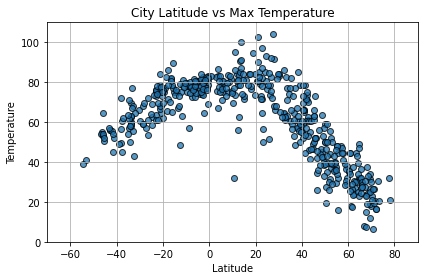

In [75]:
x_values = cities_df['Lat']
y_values = cities_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("City Latitude vs Max Temperature")
plt.ylim(0, 110)
plt.xlim(-70, 90)
plt.grid(True)
plt.tight_layout()
plt.savefig("../output_data/LatvsTemp.png", dpi=100)
plt.show()
plt.close()

## Latitude vs. Humidity Plot

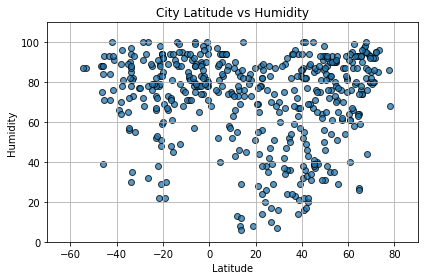

In [97]:
x_values = cities_df['Lat']
y_values = cities_df['Humidity']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs Humidity")
plt.ylim(0, 110)
plt.xlim(-70, 90)
plt.grid(True)
plt.tight_layout()
plt.savefig("../output_data/LatvsHumidity.png", dpi=100)
plt.show()
plt.close()

## Latitude vs. Cloudiness Plot

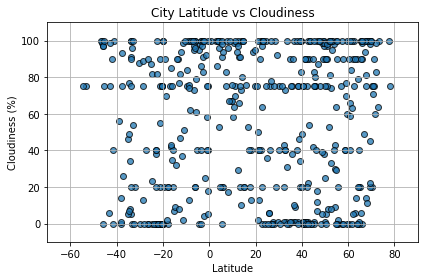

In [98]:
x_values = cities_df['Lat']
y_values = cities_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs Cloudiness")
plt.ylim(-10, 110)
plt.xlim(-70, 90)
plt.grid(True)
plt.tight_layout()
plt.savefig("../output_data/LatvsClouds.png", dpi=100)
plt.show()
plt.close()

## Latitude vs. Wind Speed Plot

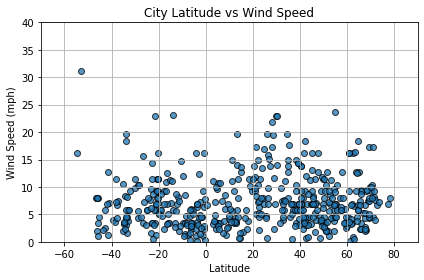

In [99]:
x_values = cities_df['Lat']
y_values = cities_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs Wind Speed")
plt.ylim(0, 40)
plt.xlim(-70, 90)
plt.grid(True)
plt.tight_layout()
plt.savefig("../output_data/LatvsWindSpd.png", dpi=100)
plt.show()
plt.close()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8665589773646682


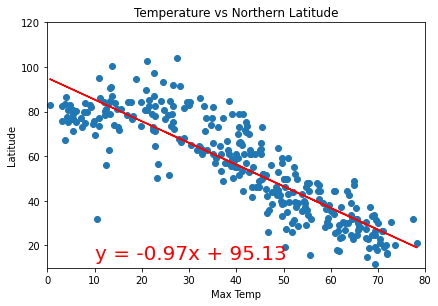

In [96]:
north_hem_df = cities_df[cities_df["Lat"] > 0]
south_hem_df = cities_df[cities_df["Lat"] < 0]

#south_hem_df
# north_hem_df

x_values = north_hem_df["Lat"]
y_values = north_hem_df["Max Temp"]

slope, inter, rvalue, pvalue, std_err = stats.linregress(x_values, y_values)
regress_values = x_values * slope + inter

print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inter,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,14),fontsize=20,color="red")
plt.ylim(10, 120)
plt.xlim(0, 80)
plt.tight_layout()
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.title("Temperature vs Northern Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


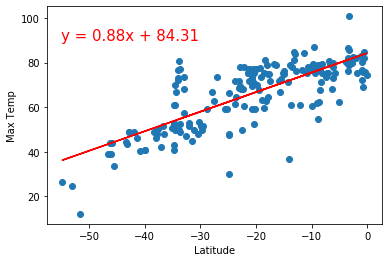

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


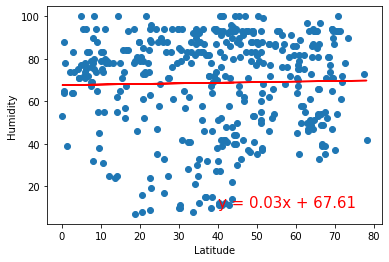

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


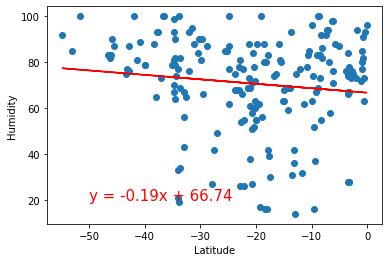

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


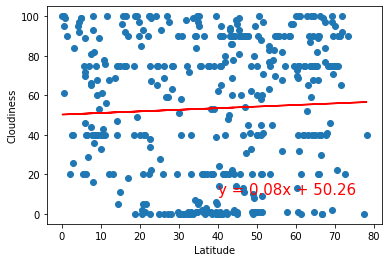

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


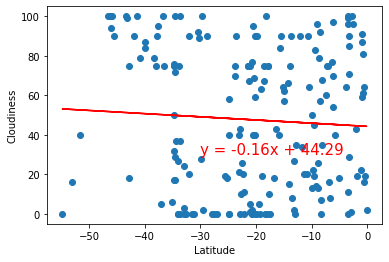

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


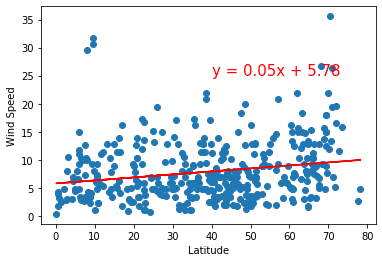

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


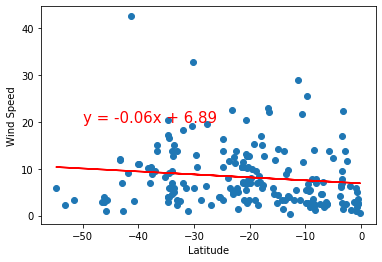